In [1]:
import pandas as pd

from io import StringIO

csv_data = """A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,"""

df = pd.read_csv(StringIO(csv_data))

df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

# 方法一：删除

In [4]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
##删除行
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
##全部是空值的才删除
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
## 保证至少有4个值不是空
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


只删除C列中有空值的行

In [8]:
## 只删除C列中有空值的行
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


# 方法二：替换值

In [15]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan,strategy='mean')

imr = imr.fit(df)
imputed_data = imr.transform(df.values)

imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# 处理分类信息

In [3]:
import pandas as pd

df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1'],    
])

df.columns = ['color','size','prize','classlabel']

df

,color,size,prize,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [3]:
size_mapping = {'XL': 3,'L':2,'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,prize,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [4]:
import numpy as np

class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}

class_mapping

{'class1': 0, 'class2': 1}

In [5]:
df['classlabel'] = df['classlabel'].map(class_mapping)

df

,color,size,prize,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [6]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}

df['classlabel'] = df['classlabel'].map(inv_class_mapping)

df

,color,size,prize,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [7]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()

y = class_le.fit_transform(df['classlabel'].values)

y

array([0, 1, 0])

In [8]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [29]:
X = df[['color','size','prize']].values

color_le = LabelEncoder()

X[:,0] = color_le.fit_transform(X[:,0])

X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

这里用OneHotEncoder，是因为用LabelEncoder做的转换有一个问题，就是RGB三个颜色有了顺序，RGB=》1，2，3，这个明显是不对的，可能回产生其他不好的后果，因此我们用一种One-Hot的方法，原理其实就是把一个分类数据，变成几个二进制数，例如RGB就变成了三个字段：[[1,0,0],[0,1,0],[0,0,1]]

原书使用的方法，用categorical_features参数，已经不再用了，所以要改方法

查了一下资料，新提供的方法，可以用make_columns_trasform方法

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer((OneHotEncoder(),(['color']) ))

preprocess.fit_transform(df)


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

一个简单的方法，用get_dummies简化了很多

In [5]:
pd.get_dummies(df[['prize','color','size']])

,prize,color_blue,color_green,color_red,size_L,size_M,size_XL
0,10.1,0,1,0,0,1,0
1,13.5,0,0,1,1,0,0
2,15.3,1,0,0,0,0,1


Scaler，主要是针对一些线性数据，两种处理方式，第一种是用最大值最小值来算一个比例，第二种是用标准差的方式

In [1]:
import numpy as np
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol', 
                    'Malic acid', 'Ash', 
                    'Alcalinity of ash', 'Magnesium', 
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols', 
                    'Proanthocyanins', 
                    'Color intensity', 'Hue', 
                    'OD280/OD315 of diluted wines', 
                    'Proline']
print('Class labels',np.unique(df_wine['Class label']))

df_wine.head()


Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [3]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)

X_test_norm = mms.transform(X_test)

In [4]:
X_train_norm

array([[0.72043011, 0.20378151, 0.53763441, ..., 0.48717949, 1.        ,
        0.5854251 ],
       [0.31989247, 0.08403361, 0.31182796, ..., 0.27350427, 0.64102564,
        0.        ],
       [0.60215054, 0.71218487, 0.48387097, ..., 0.04273504, 0.10622711,
        0.42348178],
       ...,
       [0.37365591, 0.1512605 , 0.44623656, ..., 0.44444444, 0.61904762,
        0.02672065],
       [0.77150538, 0.16596639, 0.40860215, ..., 0.31623932, 0.75457875,
        0.54493927],
       [0.84139785, 0.34033613, 0.60215054, ..., 0.06837607, 0.16117216,
        0.28178138]])

In [5]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)

X_test_std = stdsc.transform(X_test)

In [6]:
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ...,
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

加了一个Regulation，对于稀疏矩阵，用L1更好

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',solver='liblinear',C=0.1)

lr.fit(X_train_std,y_train)

print("Traing accuracy:",lr.score(X_train_std,y_train))

Traing accuracy: 0.9838709677419355


In [8]:
print('Test accuracy:',lr.score(X_test_std,y_test))


Test accuracy: 0.9814814814814815


## Feature Selection and dimensionality reduction

这里实现了一个SBS（Squential Backward Selection)算法，网上搜的一些解释：

(1)序列前向选择( SFS , Sequential Forward Selection )

　　算法描述：特征子集X从空集开始，每次选择一个特征x加入特征子集X，使得特征函数J( X)最优。简单说就是，每次都选择一个使得评价函数的取值达到最优的特征加入，其实就是一种简单的贪心算法。

　　算法评价：缺点是只能加入特征而不能去除特征。例如：特征A完全依赖于特征B与C，可以认为如果加入了特征B与C则A就是多余的。假设序列前向选择算法首先将A加入特征集，然后又将B与C加入，那么特征子集中就包含了多余的特征A。



　　(2)序列后向选择( SBS , Sequential Backward Selection )

　　算法描述：从特征全集O开始，每次从特征集O中剔除一个特征x，使得剔除特征x后评价函数值达到最优。

　　算法评价：序列后向选择与序列前向选择正好相反，它的缺点是特征只能去除不能加入。

　　另外，SFS与SBS都属于贪心算法，容易陷入局部最优值。



　　(3) 双向搜索( BDS , Bidirectional Search )

　　算法描述：使用序列前向选择(SFS)从空集开始，同时使用序列后向选择(SBS)从全集开始搜索，当两者搜索到一个相同的特征子集C时停止搜索。

　　双向搜索的出发点是  。如下图所示，O点代表搜索起点，A点代表搜索目标。灰色的圆代表单向搜索可能的搜索范围，绿色的2个圆表示某次双向搜索的搜索范围，容易证明绿色的面积必定要比灰色的要小。



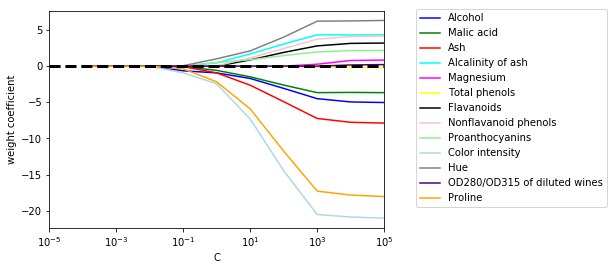

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)   
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4.0,6.0):
    lr = LogisticRegression(penalty='l1', 
                             C=10**c,
                            solver='liblinear',
                             random_state=0)
    lr.fit(X_train_std, y_train) 
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
     plt.plot(params, weights[:, column],
              label=df_wine.columns[column+1],
              color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()


In [17]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, 
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, 
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


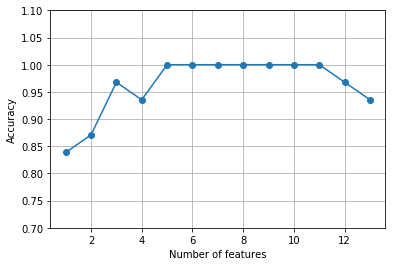

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')

plt.grid()
plt.show()


In [20]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


用全特征值来计算，可以看到训练集里面，准确率98%，测试集只有94%

In [22]:
knn.fit(X_train_std,y_train)
print('Training accuracy:', knn.score(X_train_std,y_train))
print('Test accuracy:',knn.score(X_test_std,y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


用选择过的特征集，训练集和测试集的结果很相近

In [23]:
knn.fit(X_train_std[:,k5],y_train)
print('Training accuracy:', knn.score(X_train_std[:,k5],y_train))
print('Test accuracy:',knn.score(X_test_std[:,k5],y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


## 用随机森林算法去计算各个特征的重要性

In [27]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators = 10000,random_state=0,n_jobs=-1)

forest.fit(X_train,y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%02d) %- *s %f" % (f + 1,30,feat_labels[indices[f]],importances[indices[f]]))

01) Color intensity                0.182483
02) Proline                        0.158610
03) Flavanoids                     0.150948
04) OD280/OD315 of diluted wines   0.131987
05) Alcohol                        0.106589
06) Hue                            0.078243
07) Total phenols                  0.060718
08) Alcalinity of ash              0.032033
09) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


<function matplotlib.pyplot.show(*args, **kw)>

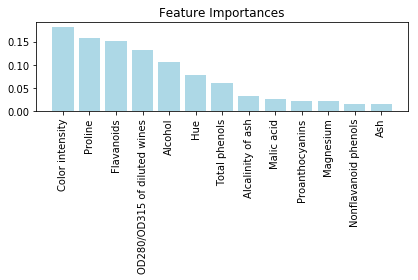

In [29]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],
           rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show

In [30]:
X_selected = forest.transform(X_train, threshold=0.15)

X_selected.shape

AttributeError: 'RandomForestClassifier' object has no attribute 'transform'

以下是从另外一篇文章抄来的东西

In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/house/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
y = train.pop('SalePrice').values

In [6]:
vc = train['HouseStyle'].value_counts()

In [7]:
vc

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [8]:
hs_train = train[['HouseStyle']].copy()
hs_train.ndim

2

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

hs_train_transformed = ohe.fit_transform(hs_train)

hs_train_transformed

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [10]:
feature_names = ohe.get_feature_names()

feature_names

array(['x0_1.5Fin', 'x0_1.5Unf', 'x0_1Story', 'x0_2.5Fin', 'x0_2.5Unf',
       'x0_2Story', 'x0_SFoyer', 'x0_SLvl'], dtype=object)

In [11]:
row0 = hs_train_transformed[0]

row0

array([0., 0., 0., 0., 0., 1., 0., 0.])

In [12]:
feature_names[row0 == 1]

array(['x0_2Story'], dtype=object)

In [13]:
hs_train.values[0]

array(['2Story'], dtype=object)

In [15]:
ohe.inverse_transform([row0])

array([['2Story']], dtype=object)

In [17]:
hs_inv = ohe.inverse_transform(hs_train_transformed)
hs_inv

array([['2Story'],
       ['1Story'],
       ['2Story'],
       ...,
       ['2Story'],
       ['1Story'],
       ['1Story']], dtype=object)

In [18]:
np.array_equal(hs_inv,hs_train)

True

In [19]:
test = pd.read_csv('data/house/test.csv')
hs_test = test[['HouseStyle']].copy()
hs_test_transformed = ohe.transform(hs_test)
hs_test_transformed


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_si_step = ('si', SimpleImputer(strategy='constant',
                   fill_value='MISSING'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                    handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_cols = ['RoofMatl', 'HouseStyle']
cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

X_cat_transformed = ct.fit_transform(train)
X_cat_transformed.shape

(1460, 16)

In [32]:
xpd = pd.DataFrame(X_cat_transformed)

pl = ct.named_transformers_['cat']
ohe = pl.named_steps['ohe']

xpd.columns = ohe.get_feature_names()

df2 = train.join(xpd)
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,x0_WdShake,x0_WdShngl,x1_1.5Fin,x1_1.5Unf,x1_1Story,x1_2.5Fin,x1_2.5Unf,x1_2Story,x1_SFoyer,x1_SLvl
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
